## Análise descritiva dos jogadores de futebol FIFA

Este notebook apresenta uma análise descritiva dos dados de jogadores de futebol registrados na FIFA. Foram usadas técnicas de estatística descritiva e exploraremos a distribuição de algumas variáveis utilizando R, buscando entender o perfil dos jogadores e identificar um modelo probabilístico que represente uma variável escolhida.

#### Preparação do ambiente e carregamento dos Dados

Carregando as bibliotecas necessárias

In [2]:
library(tidyverse)
library(readxl)
library(MASS)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Anexando pacote: 'MASS'


O seguinte objeto é mascarado por 'package:dplyr':

    select




Carregando o arquivo CSV com dados dos jogadores

In [3]:
dados_jogadores <- read.csv("../data/Anexo_Projeto_fifa_world_national_teams_versao_oficial_20241virgula.csv", sep=",", stringsAsFactors = FALSE)

Exibido as primeiras linhas do arquivo para consulta das variáveis

In [4]:
head(dados_jogadores)

,id,name,full_name,overall_rating,value_euro,wage_euro,nationality,national_team,club_team,age,⋯,crossing,finishing,heading_accuracy,short_passing,dribbling,jumping,strength,long_shots,aggression,GK_reflexes
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,158023,Messi,Lionel Andrés Messi Cuccittini,94,110500000,565000,Argentina,Argentina,FC Barcelona,31,⋯,86,95,70,92,97,68,66,94,48,8
2,153079,Aguero,Sergio Leonel Agüero del Castillo,89,64500000,300000,Argentina,Argentina,Manchester City,30,⋯,70,93,77,81,89,81,73,83,65,14
3,211110,Dybala,Paulo Bruno Exequiel Dybala,89,89000000,205000,Argentina,Argentina,Juventus,25,⋯,82,84,68,87,92,75,65,88,48,8
4,201399,Icardi,Mauro Emanuel Icardi Rivero,87,64500000,130000,Argentina,Argentina,Inter,26,⋯,46,91,91,73,77,94,76,70,56,9
5,226226,Lo Celso,Giovani Lo Celso,82,30000000,83000,Argentina,Argentina,Real Betis,22,⋯,75,77,59,82,84,64,69,76,65,14
6,199667,Funes Mori,José Ramiro Funes Mori,77,8500000,28000,Argentina,Argentina,Villarreal CF,28,⋯,66,40,79,70,63,77,78,56,83,7


Entrega 1: encontrando e listando uma variável de cada tipo

De acordo com os dados e descrição das variáveis no dicionário, encontramos os seguintes exemplos:

- Qualitativa nominal: nationality 
- Qualitativa ordinal: international_reputation(1-5)
- Quantitativa discreta: age
- Quantitativa contínua: wage_euro

Entrega 2: Tabelas de frequência para variáveis qualitativas

In [5]:
# Tabela de frequência para Nacionalidade
freq_nacionalidade <- table(dados_jogadores$nationality)
print(freq_nacionalidade)

# Tabela de frequência para clube no qual atua
freq_clube <- table(dados_jogadores$club_team)
print(freq_clube)


                              Argentina           Australia             Austria 
                 14                  17                  13                  16 
            Belgium              Brazil            Bulgaria            Cameroon 
                 19                  23                   3                  17 
             Canada               Chile            Colombia      Czech Republic 
                 19                  10                  12                  20 
            Denmark             Ecuador               Egypt             England 
                 23                   6                   7                  23 
            Finland              France             Germany              Greece 
                 19                  23                  23                  21 
            Hungary             Iceland               Italy              Mexico 
                  8                  13                  22                  10 
        Netherlands        

Entrega 3: Uma tabela com medidas de posição e variabilidade para ao menos 5 variáveis

Foram escolhidas as seguintes variáveis quantitativas para calcular as medidas de posição (média e mediana) e variabilidade (desvio padrão):

- Idade (age)
- Altura (height_cm)
- Peso (weight_kgs)
- Salário (wage_euro)
- Reflexos como goleiro (GK_reflexes)

In [6]:
medidas_descritivas <- dados_jogadores %>%
  summarize(
    media_idade = mean(age, na.rm = TRUE),
    mediana_idade = median(age, na.rm = TRUE),
    desvio_idade = sd(age, na.rm = TRUE),
    media_altura = mean(height_cm, na.rm = TRUE),
    mediana_altura = median(height_cm, na.rm = TRUE),
    desvio_altura = sd(height_cm, na.rm = TRUE),
    media_peso = mean(weight_kgs, na.rm = TRUE),
    mediana_peso = median(weight_kgs, na.rm = TRUE),
    desvio_peso = sd(weight_kgs, na.rm = TRUE),
    media_salario = mean(wage_euro, na.rm = TRUE),
    mediana_salario = median(wage_euro, na.rm = TRUE),
    desvio_salario = sd(wage_euro, na.rm = TRUE),
    media_reflexo_goleiro = mean(GK_reflexes, na.rm = TRUE),
    mediana_reflexo_goleiro = median(GK_reflexes, na.rm = TRUE),
    desvio_reflexo_goleiro = sd(GK_reflexes, na.rm = TRUE)
  )

print(medidas_descritivas)

  media_idade mediana_idade desvio_idade media_altura mediana_altura
1    26.55966            26     3.600516     177.0795            183
  desvio_altura media_peso mediana_peso desvio_peso media_salario
1      14.30304   77.70455           77    7.310094      49998.58
  mediana_salario desvio_salario media_reflexo_goleiro mediana_reflexo_goleiro
1           27000       65658.31              18.42614                      11
  desvio_reflexo_goleiro
1               22.33268


Entrega 4: Visualização de resultados

1. Gráfico de barras para Nacionalidade

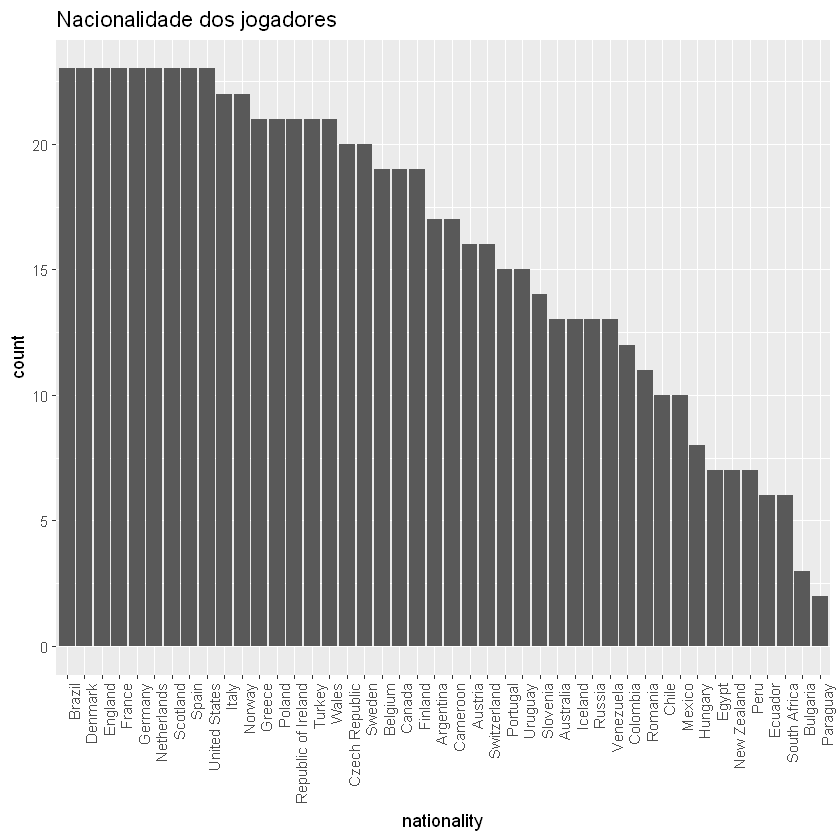

In [15]:
ggplot(dados_jogadores, aes(x=nationality)) +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Nacionalidade dos jogadores")

2. Boxspot do valor, em Euros, dos jogadores no mercado

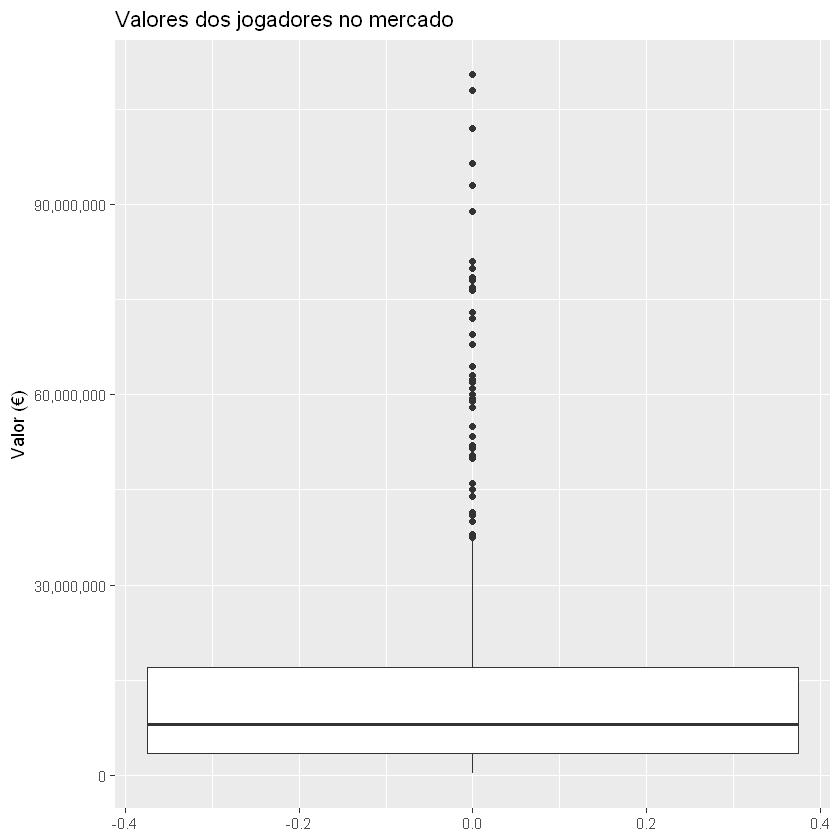

In [20]:
# Removendo valores não finitos da variável 'value_euro'
dados_jogadores_limpo <- dados_jogadores[is.finite(dados_jogadores$value_euro), ]

# Criando o boxplot com o conjunto de dados limpo
ggplot(dados_jogadores_limpo, aes(y = value_euro)) +
  geom_boxplot() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Valores dos jogadores no mercado", y = "Valor (€)") 

Entrega 5: Modelo Probabilístico

      mean           sd     
  26.55965909    3.59795837 
 ( 0.13560316) ( 0.09588591)


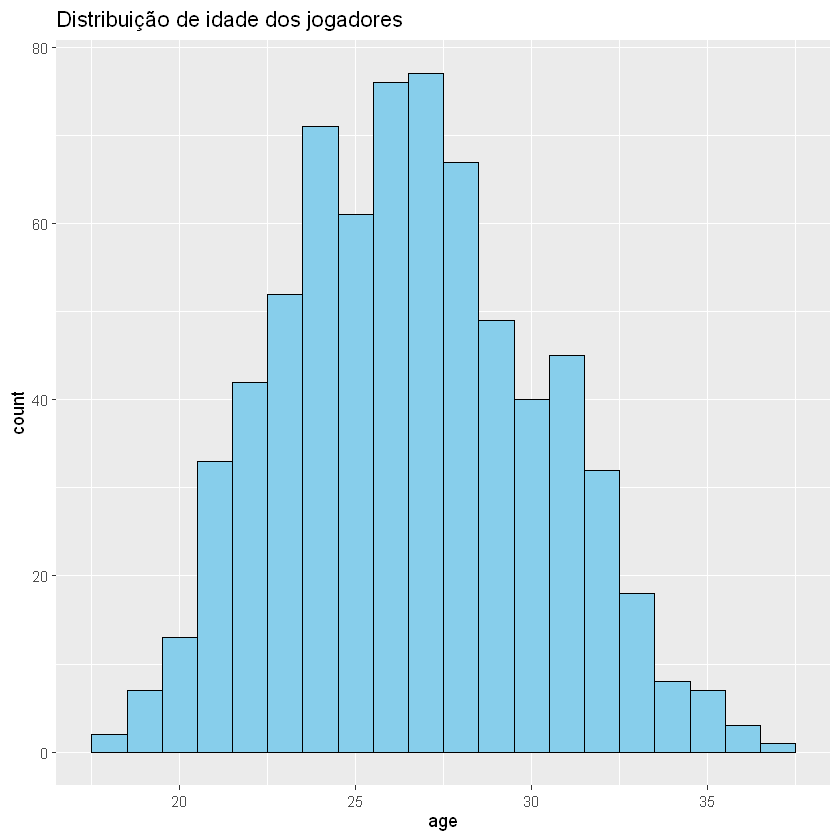

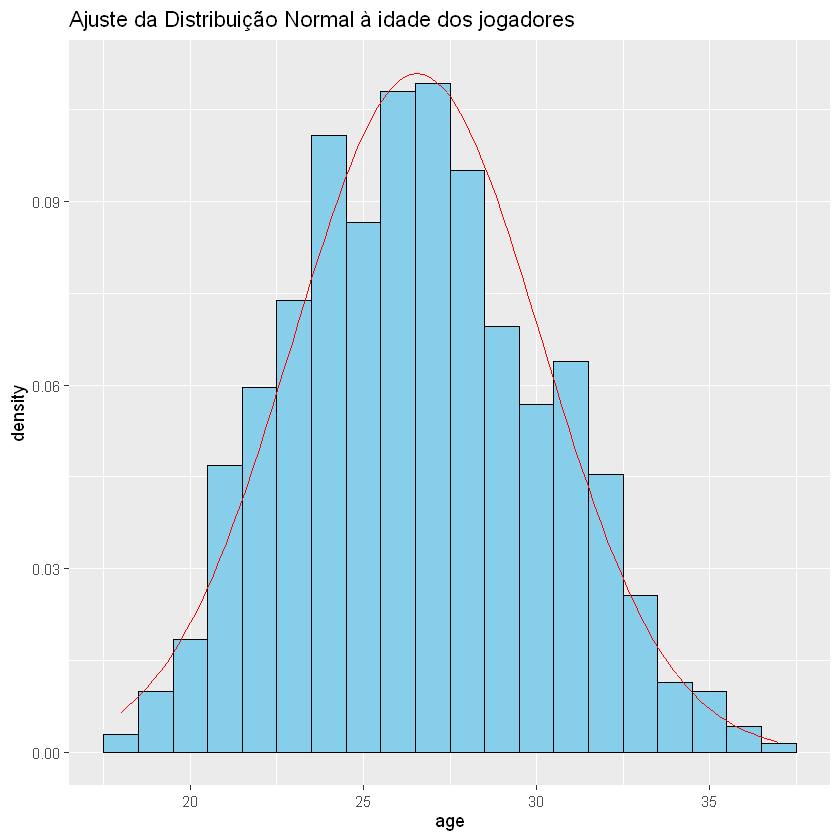

In [ ]:
# Removendo valores ausentes ou infinitos na variável 'age'
dados_jogadores <- dados_jogadores[is.finite(dados_jogadores$age), ]

# Histograma de Idade para verificar a distribuição
ggplot(dados_jogadores, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribuição de idade dos jogadores")

# Ajuste de uma distribuição normal para Idade
idade_params <- fitdistr(dados_jogadores$age, "normal")
print(idade_params)

# Visualizando a curva normal ajustada sobre o histograma
ggplot(dados_jogadores, aes(x = age)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1, fill = "skyblue", color = "black") +
  stat_function(fun = dnorm, args = list(mean = idade_params$estimate[1], sd = idade_params$estimate[2]), color = "red") +
  labs(title = "Ajuste da Distribuição Normal à idade dos jogadores")